## Dataset Link

In [1]:
# https://www.kaggle.com/datasets/sonalshinde123/human-decision-fatigue-behavioral-dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading a dataset

In [3]:
df = pd.read_csv(r"C:\Users\Shant\OneDrive\Documents\My Folder\Dataset\human_decision_fatigue_dataset.csv")

## Analysis the dataset

In [4]:
df.head()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Time_of_Day,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score,Fatigue_Level,System_Recommendation
0,7,28,7,2.30,5.8,Evening,0,2.4,0.000,2.6,15.6,Low,Continue
1,15,77,22,3.65,4.5,Afternoon,3,1.9,0.143,4.5,97.3,High,Take Break
2,11,57,23,3.67,6.8,Night,2,2.1,0.000,4.1,55.4,Moderate,Slow Down
3,8,39,10,2.39,5.3,Afternoon,1,1.0,0.000,2.3,29.7,Low,Continue
4,7,46,16,3.05,8.2,Night,1,2.8,0.000,3.9,19.1,Low,Continue


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hours_Awake             25000 non-null  int64  
 1   Decisions_Made          25000 non-null  int64  
 2   Task_Switches           25000 non-null  int64  
 3   Avg_Decision_Time_sec   25000 non-null  float64
 4   Sleep_Hours_Last_Night  25000 non-null  float64
 5   Time_of_Day             25000 non-null  object 
 6   Caffeine_Intake_Cups    25000 non-null  int64  
 7   Stress_Level_1_10       25000 non-null  float64
 8   Error_Rate              25000 non-null  float64
 9   Cognitive_Load_Score    25000 non-null  float64
 10  Decision_Fatigue_Score  25000 non-null  float64
 11  Fatigue_Level           25000 non-null  object 
 12  System_Recommendation   25000 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [6]:
df.describe()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,9.088280,45.433080,13.623480,2.918346,6.085956,1.897240,2.202736,0.031877,3.365784,40.579280
std,4.928093,25.611583,8.521595,0.942644,1.114586,1.430483,1.329868,0.057457,1.729092,36.704221
min,1.000000,0.000000,0.000000,0.500000,2.000000,0.000000,1.000000,0.000000,0.600000,0.000000
25%,5.000000,23.000000,7.000000,2.270000,5.300000,1.000000,1.000000,0.000000,1.900000,0.000000
50%,9.000000,45.000000,13.000000,2.910000,6.100000,2.000000,1.800000,0.000000,3.200000,34.650000
75%,13.000000,67.000000,20.000000,3.550000,6.900000,3.000000,3.100000,0.045000,4.600000,74.200000
max,17.000000,117.000000,48.000000,6.800000,9.000000,6.000000,8.700000,0.359000,9.700000,100.000000


C:\Users\Shant\AppData\Local\Temp\ipykernel_18880\2187904999.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = df.Hours_Awake, y = df.Decisions_Made, ci = None)


<Axes: xlabel='Hours_Awake', ylabel='Decisions_Made'>

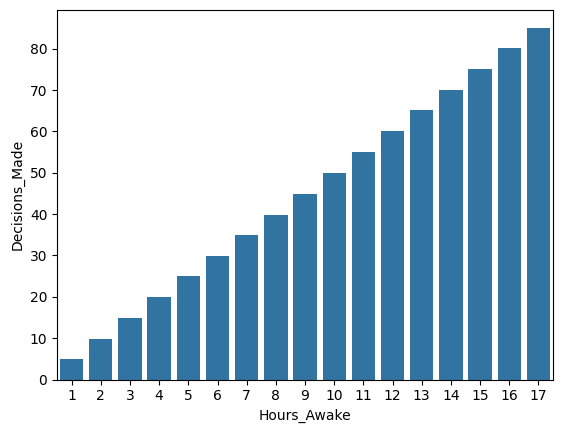

In [7]:
sns.barplot(data = df, x = df.Hours_Awake, y = df.Decisions_Made, ci = None)

<Axes: xlabel='Fatigue_Level', ylabel='Decision_Fatigue_Score'>

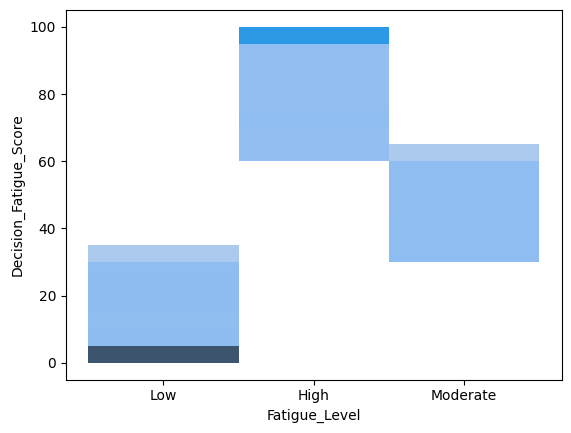

In [8]:
sns.histplot(data = df, x = df.Fatigue_Level, y = df.Decision_Fatigue_Score)

## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [10]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [11]:
le = LabelEncoder()

In [13]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col])

In [14]:
x = df.iloc[:, :-1]
y = df.System_Recommendation

In [15]:
x.shape

(25000, 12)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,shuffle=True, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

## Building models

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
param = {
    'n_neighbors': [5, 11, 13, 21, 31, 51, 101, 121],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2],
    'metric': ['cityblock', 'euclidean', 'haversine', 'manhattan', 'nan_euclidean']
}

In [21]:
knn = KNeighborsClassifier()

In [22]:
random = RandomizedSearchCV(estimator=knn,param_distributions=param, n_iter=5, pre_dispatch='all', cv=10)

In [23]:
random.fit(x_train, y_train)

C:\Users\Shant\OneDrive\Desktop\Data_Science\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shant\OneDrive\Desktop\Data_Science\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shant\OneDrive\Desktop\Data_Science\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shant\OneDrive\Desktop\Data_Science\Lib\si

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'algorithm': ['ball_tree', 'kd_tree', ...], 'leaf_size': [10, 30, ...], 'metric': ['cityblock', 'euclidean', ...], 'n_neighbors': [5, 11, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used

In [24]:
y_pred = random.predict(x_test)

## Evaluation metrics

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, auc

In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      1221
           2       1.00      1.00      1.00      2101

    accuracy                           1.00      6250
   macro avg       1.00      1.00      1.00      6250
weighted avg       1.00      1.00      1.00      6250



In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2928,    0,    0],
       [   0, 1221,    0],
       [   0,    0, 2101]])

## Saving a model

In [28]:
import joblib

In [29]:
best_model = random.best_estimator_
joblib.dump(best_model, 'fatigue_behavioral_best_model.joblib')

['fatigue_behavioral_best_model.joblib']

In [30]:
checkpoint = {
    'model': best_model,
    'encoders': le
}
joblib.dump(checkpoint, 'fatigue_behavioral.joblib')

['fatigue_behavioral.joblib']